<a id="import"></a>
# <p style="background-color:coral; font-family:calibri; color:Black; font-size:150%; text-align:center; border-radius:25px 25px;">Anomaly Detection and Event Prediction Using Sensor Networks</p>

<div style="border-radius:10px; padding: 15px; background-color:white; font-size:120%; text-align:left">

<h3 align="left"><font color=Black>Problem Statement:</font></h3>

The goal of this project is to develop a comprehensive Anomaly Detection and Event Prediction system aimed at significantly enhancing monitoring capabilities within sensor networks. This system will enable proactive responses to potential issues, ultimately revolutionizing sensor network technology. The system should offer actionable insights to optimize resource allocation and operational efficiency.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import tkinter as tk
from tkinter import messagebox
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import ipywidgets as widgets
from IPython.display import display, HTML
from scipy import stats


import warnings
warnings.filterwarnings('ignore')

# Load and Inspect the Data

In [2]:
df = pd.read_csv("data.csv")
df

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56
...,...,...,...,...,...
177,50000,36,72,352,101
178,50000,37,74,364,107
179,50000,38,76,376,114
180,50000,39,78,388,121


In [3]:
df.head()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,182.0,24375.000000,15197.252769,5000.0,9375.0,21875.0,39375.00,50000.0
Sensing Range,182.0,27.500000,7.520690,15.0,21.0,27.5,34.00,40.0
Transmission Range,182.0,55.000000,15.041379,30.0,42.0,55.0,68.00,80.0
Number of Sensor nodes,182.0,250.000000,90.248276,100.0,172.0,250.0,328.00,400.0
Number of Barriers,182.0,94.071429,65.171006,12.0,42.0,80.0,128.75,320.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Area                    182 non-null    int64
 1   Sensing Range           182 non-null    int64
 2   Transmission Range      182 non-null    int64
 3   Number of Sensor nodes  182 non-null    int64
 4   Number of Barriers      182 non-null    int64
dtypes: int64(5)
memory usage: 7.2 KB


In [6]:
df.describe()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
count,182.000000,182.00000,182.000000,182.000000,182.000000
mean,24375.000000,27.50000,55.000000,250.000000,94.071429
std,15197.252769,7.52069,15.041379,90.248276,65.171006
min,5000.000000,15.00000,30.000000,100.000000,12.000000
25%,9375.000000,21.00000,42.000000,172.000000,42.000000
50%,21875.000000,27.50000,55.000000,250.000000,80.000000
75%,39375.000000,34.00000,68.000000,328.000000,128.750000
max,50000.000000,40.00000,80.000000,400.000000,320.000000


# Data Analysis or EDA

Histograms will show the distribution of each numeric feature***

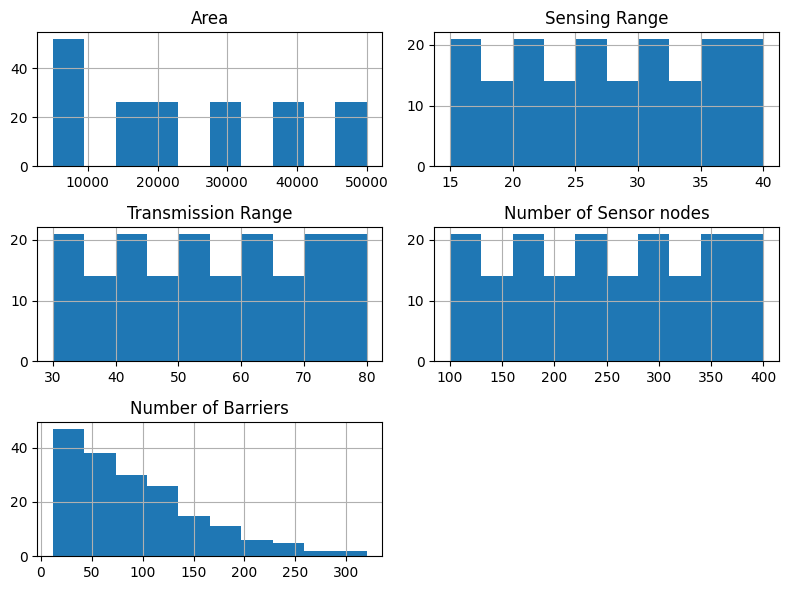

In [7]:
df.hist(figsize=(8, 6))
plt.tight_layout()
plt.show()

Box plots can highlight outliers and the spread of the data***

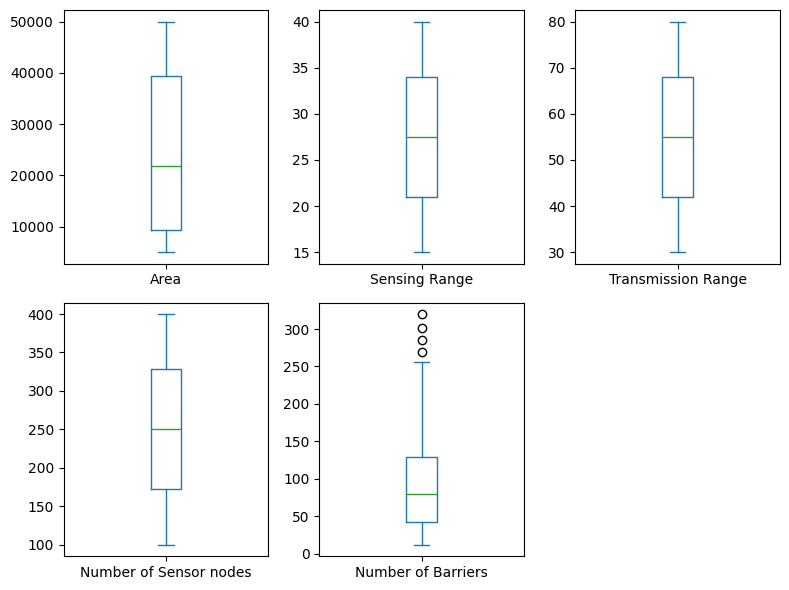

In [8]:
df.plot(kind='box', subplots=True, layout=(2,3), figsize=(8, 6))
plt.tight_layout()
plt.show()

Scatter plots can reveal relationships between two variables***

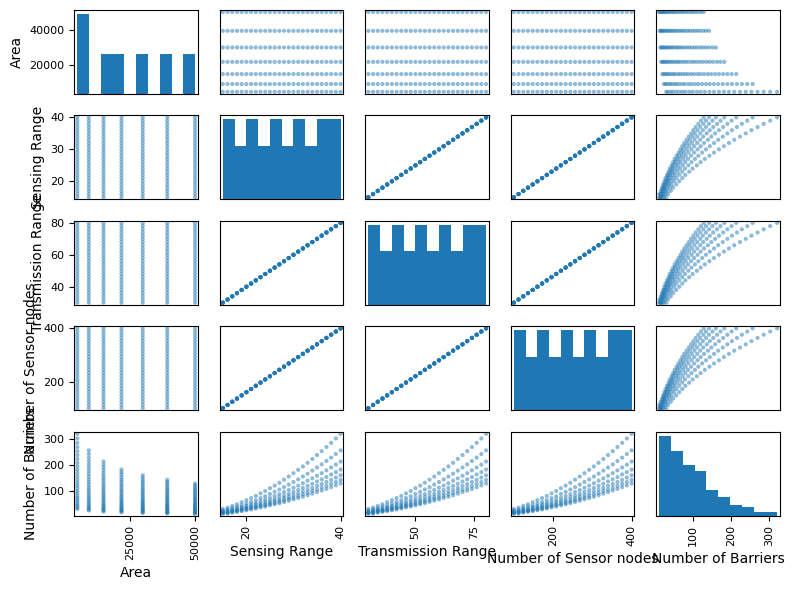

In [9]:
pd.plotting.scatter_matrix(df, figsize=(8, 6))
plt.tight_layout()
plt.show()

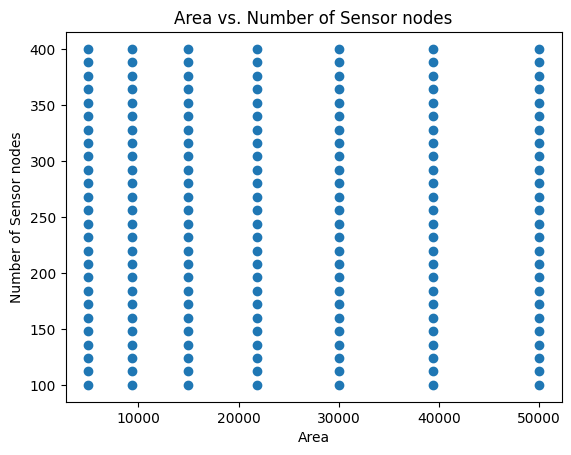

In [10]:
plt.scatter(df['Area'], df['Number of Sensor nodes'])
plt.xlabel('Area')
plt.ylabel('Number of Sensor nodes')
plt.title('Area vs. Number of Sensor nodes')
plt.show()

Correlation Analysis***

                                Area  Sensing Range  Transmission Range  \
Area                    1.000000e+00   3.095077e-16        3.095077e-16   
Sensing Range           3.095077e-16   1.000000e+00        1.000000e+00   
Transmission Range      3.095077e-16   1.000000e+00        1.000000e+00   
Number of Sensor nodes -1.162999e-16   1.000000e+00        1.000000e+00   
Number of Barriers     -4.234383e-01   8.383655e-01        8.383655e-01   

                        Number of Sensor nodes  Number of Barriers  
Area                             -1.162999e-16           -0.423438  
Sensing Range                     1.000000e+00            0.838365  
Transmission Range                1.000000e+00            0.838365  
Number of Sensor nodes            1.000000e+00            0.838365  
Number of Barriers                8.383655e-01            1.000000  


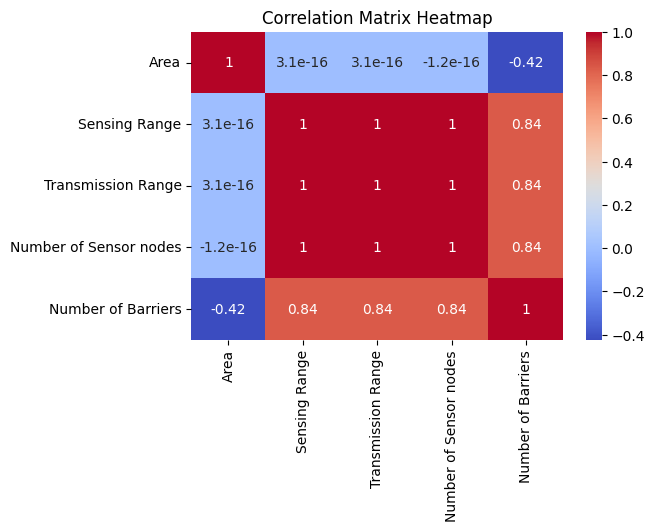

In [11]:
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Identify Outliers

In [12]:
z_scores = stats.zscore(df)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_no_outliers = df[filtered_entries]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Feature Engineering

In [13]:
df['Node Density'] = df['Number of Sensor nodes'] / df['Area']
df

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers,Node Density
0,5000,15,30,100,30,0.02000
1,5000,16,32,112,35,0.02240
2,5000,17,34,124,42,0.02480
3,5000,18,36,136,48,0.02720
4,5000,19,38,148,56,0.02960
...,...,...,...,...,...,...
177,50000,36,72,352,101,0.00704
178,50000,37,74,364,107,0.00728
179,50000,38,76,376,114,0.00752
180,50000,39,78,388,121,0.00776


Clustering 

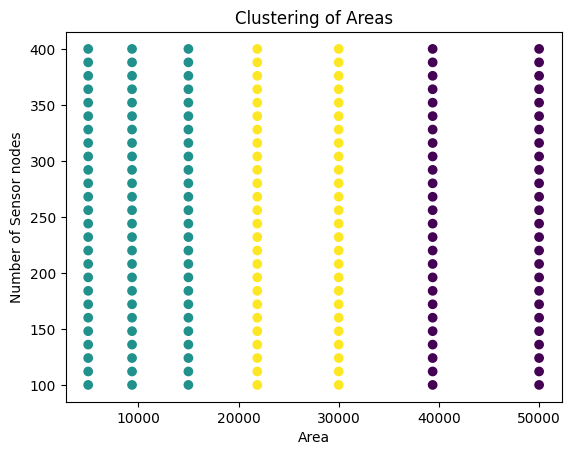

In [14]:
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df)

plt.scatter(df['Area'], df['Number of Sensor nodes'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Area')
plt.ylabel('Number of Sensor nodes')
plt.title('Clustering of Areas')
plt.show()

Regression Analysis

In [15]:
X = df[['Area', 'Sensing Range', 'Transmission Range', 'Number of Barriers']]
y = df['Number of Sensor nodes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f'Model R^2 score: {score}')


Model R^2 score: 1.0


# Distribution of Continuous Variables

In [16]:
# Define the continuous features
continuous_features = ['Area','Sensing Range','Transmission Range','Number of Sensor nodes','Number of Barriers']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

Area                       int64
Sensing Range              int64
Transmission Range         int64
Number of Sensor nodes     int64
Number of Barriers         int64
Node Density              object
Cluster                   object
dtype: object

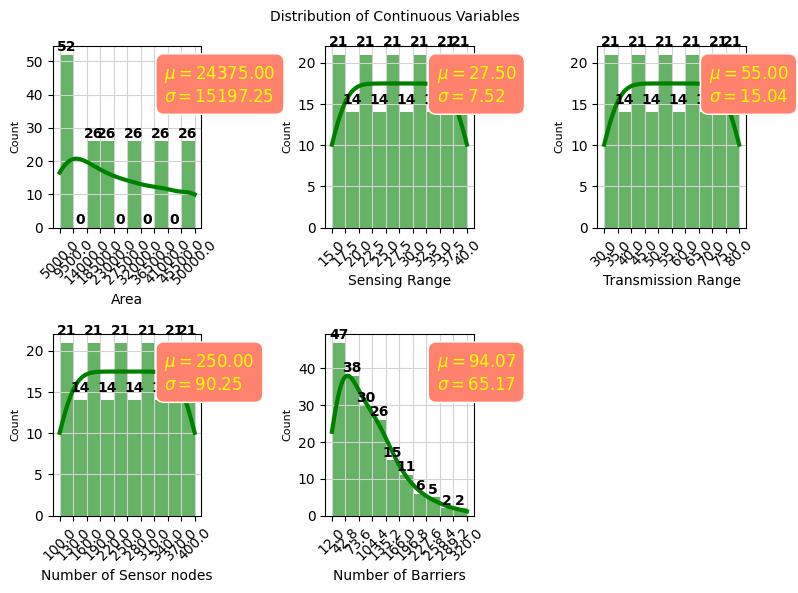

In [17]:
# Filter out continuous features for the univariate analysis
df_continuous = df[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='green', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=10)
    ax[x, y].set_ylabel('Count', fontsize=8)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='yellow', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=10)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [18]:
# Define the features (X) and the output labels (y)
X = df[['Area','Sensing Range', 'Transmission Range', 'Number of Barriers']]
y = df['Number of Sensor nodes']

In [19]:
X

,Area,Sensing Range,Transmission Range,Number of Barriers
0,5000,15,30,30
1,5000,16,32,35
2,5000,17,34,42
3,5000,18,36,48
4,5000,19,38,56
...,...,...,...,...
177,50000,36,72,101
178,50000,37,74,107
179,50000,38,76,114
180,50000,39,78,121


In [20]:
y

0      100
1      112
2      124
3      136
4      148
      ... 
177    352
178    364
179    376
180    388
181    400
Name: Number of Sensor nodes, Length: 182, dtype: int64

# Model Building

## 1) CNN

In [21]:
filepath = "data.csv"
df = pd.read_csv(filepath)
df

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56
...,...,...,...,...,...
177,50000,36,72,352,101
178,50000,37,74,364,107
179,50000,38,76,376,114
180,50000,39,78,388,121


In [22]:
df.value_counts()

Area   Sensing Range  Transmission Range  Number of Sensor nodes  Number of Barriers
5000   15             30                  100                     30                    1
30000  25             50                  220                     55                    1
       27             54                  244                     65                    1
       28             56                  256                     71                    1
       29             58                  268                     77                    1
                                                                                       ..
15000  25             50                  220                     73                    1
       26             52                  232                     80                    1
       27             54                  244                     87                    1
       28             56                  256                     95                    1
50000  40      

In [23]:
X = df[['Area','Sensing Range','Transmission Range','Number of Sensor nodes','Number of Barriers']].values

In [24]:
X.shape

(182, 5)

In [25]:
Y = pd.get_dummies(df['Area']).values

In [26]:
Y.shape

(182, 7)

In [27]:
X

array([[ 5000,    15,    30,   100,    30],
       [ 5000,    16,    32,   112,    35],
       [ 5000,    17,    34,   124,    42],
       [ 5000,    18,    36,   136,    48],
       [ 5000,    19,    38,   148,    56],
       [ 5000,    20,    40,   160,    64],
       [ 5000,    21,    42,   172,    72],
       [ 5000,    22,    44,   184,    80],
       [ 5000,    23,    46,   196,    90],
       [ 5000,    24,    48,   208,    99],
       [ 5000,    25,    50,   220,   110],
       [ 5000,    26,    52,   232,   120],
       [ 5000,    27,    54,   244,   131],
       [ 5000,    28,    56,   256,   143],
       [ 5000,    29,    58,   268,   155],
       [ 5000,    30,    60,   280,   168],
       [ 5000,    31,    62,   292,   181],
       [ 5000,    32,    64,   304,   194],
       [ 5000,    33,    66,   316,   208],
       [ 5000,    34,    68,   328,   223],
       [ 5000,    35,    70,   340,   238],
       [ 5000,    36,    72,   352,   253],
       [ 5000,    37,    74,   3

In [28]:
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [29]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(X)

MinMaxScaler()

In [31]:
normalized_x = scaler.transform(X)

In [32]:
normalized_x

array([[0.        , 0.        , 0.        , 0.        , 0.05844156],
       [0.        , 0.04      , 0.04      , 0.04      , 0.07467532],
       [0.        , 0.08      , 0.08      , 0.08      , 0.0974026 ],
       [0.        , 0.12      , 0.12      , 0.12      , 0.11688312],
       [0.        , 0.16      , 0.16      , 0.16      , 0.14285714],
       [0.        , 0.2       , 0.2       , 0.2       , 0.16883117],
       [0.        , 0.24      , 0.24      , 0.24      , 0.19480519],
       [0.        , 0.28      , 0.28      , 0.28      , 0.22077922],
       [0.        , 0.32      , 0.32      , 0.32      , 0.25324675],
       [0.        , 0.36      , 0.36      , 0.36      , 0.28246753],
       [0.        , 0.4       , 0.4       , 0.4       , 0.31818182],
       [0.        , 0.44      , 0.44      , 0.44      , 0.35064935],
       [0.        , 0.48      , 0.48      , 0.48      , 0.38636364],
       [0.        , 0.52      , 0.52      , 0.52      , 0.42532468],
       [0.        , 0.56      , 0.

In [33]:
normalized_x.shape

(182, 5)

In [34]:
scaler.fit(Y)

MinMaxScaler()

In [35]:
normalized_y = scaler.transform(Y)

In [36]:
normalized_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_x, normalized_y, random_state=10, test_size=0.2)

In [38]:
X_train.shape

(145, 5)

In [39]:
model = Sequential()

In [40]:
model.add(Dense(2000, activation='relu',input_dim=24))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(800,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              50000     
                                                                 
 dense_1 (Dense)             (None, 1500)              3001500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 800)               1200800   
                                                                 
 dropout_1 (Dropout)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 400)               320400    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0

## 2) Decision Tree

In [42]:
filepath = "data.csv"
df = pd.read_csv(filepath)
df

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56
...,...,...,...,...,...
177,50000,36,72,352,101
178,50000,37,74,364,107
179,50000,38,76,376,114
180,50000,39,78,388,121


In [43]:
df.value_counts()

Area   Sensing Range  Transmission Range  Number of Sensor nodes  Number of Barriers
5000   15             30                  100                     30                    1
30000  25             50                  220                     55                    1
       27             54                  244                     65                    1
       28             56                  256                     71                    1
       29             58                  268                     77                    1
                                                                                       ..
15000  25             50                  220                     73                    1
       26             52                  232                     80                    1
       27             54                  244                     87                    1
       28             56                  256                     95                    1
50000  40      

In [44]:
DT = DecisionTreeClassifier()

In [45]:
X = df[['Area','Sensing Range','Transmission Range','Number of Sensor nodes','Number of Barriers']]
Y = df['Area']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [46]:
start = time.time()
print('program start...')
print()

DT.fit(X_train, Y_train)
print()

print('prediction:')
y_pred = DT.predict(X_test)
print(y_pred)
print()

print('Score:')
score = DT.score(X_test,Y_test)
print(score)

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


prediction:
[39375 39375 15000 50000 15000 50000 21875  5000 39375 30000  9375  5000
 15000 15000 15000 30000 21875 21875  5000 39375 30000  5000  9375 50000
 30000 15000 21875 50000 30000 15000 15000 15000 39375 15000 30000 50000
  5000]

Score:
1.0
program end...

time cost: 
0.020288467407226562 seconds


In [47]:
print("Classification Report :")
print(classification_report(Y_test, y_pred))

Classification Report :
              precision    recall  f1-score   support

        5000       1.00      1.00      1.00         5
        9375       1.00      1.00      1.00         2
       15000       1.00      1.00      1.00        10
       21875       1.00      1.00      1.00         4
       30000       1.00      1.00      1.00         6
       39375       1.00      1.00      1.00         5
       50000       1.00      1.00      1.00         5

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



## 3) Naive Bayes

In [48]:
filepath = "data.csv"
df = pd.read_csv(filepath)
df

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56
...,...,...,...,...,...
177,50000,36,72,352,101
178,50000,37,74,364,107
179,50000,38,76,376,114
180,50000,39,78,388,121


In [49]:
df.shape

(182, 5)

In [50]:
df.value_counts()

Area   Sensing Range  Transmission Range  Number of Sensor nodes  Number of Barriers
5000   15             30                  100                     30                    1
30000  25             50                  220                     55                    1
       27             54                  244                     65                    1
       28             56                  256                     71                    1
       29             58                  268                     77                    1
                                                                                       ..
15000  25             50                  220                     73                    1
       26             52                  232                     80                    1
       27             54                  244                     87                    1
       28             56                  256                     95                    1
50000  40      

In [51]:
print(df.columns.tolist())

['Area', 'Sensing Range', 'Transmission Range', 'Number of Sensor nodes', 'Number of Barriers']


In [52]:
X = df[['Area','Sensing Range','Transmission Range','Number of Sensor nodes','Number of Barriers']]
Y = df['Area']

In [53]:
scaler = MinMaxScaler()
scaler.fit(X)
normalized_x = scaler.transform(X)
normalized_x

array([[0.        , 0.        , 0.        , 0.        , 0.05844156],
       [0.        , 0.04      , 0.04      , 0.04      , 0.07467532],
       [0.        , 0.08      , 0.08      , 0.08      , 0.0974026 ],
       [0.        , 0.12      , 0.12      , 0.12      , 0.11688312],
       [0.        , 0.16      , 0.16      , 0.16      , 0.14285714],
       [0.        , 0.2       , 0.2       , 0.2       , 0.16883117],
       [0.        , 0.24      , 0.24      , 0.24      , 0.19480519],
       [0.        , 0.28      , 0.28      , 0.28      , 0.22077922],
       [0.        , 0.32      , 0.32      , 0.32      , 0.25324675],
       [0.        , 0.36      , 0.36      , 0.36      , 0.28246753],
       [0.        , 0.4       , 0.4       , 0.4       , 0.31818182],
       [0.        , 0.44      , 0.44      , 0.44      , 0.35064935],
       [0.        , 0.48      , 0.48      , 0.48      , 0.38636364],
       [0.        , 0.52      , 0.52      , 0.52      , 0.42532468],
       [0.        , 0.56      , 0.

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_x, Y, random_state=100, test_size=0.2)

In [55]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [56]:
start = time.time()
print('program start...')
print()

clf = GaussianNB().fit(X_train, Y_train)
print()
print(clf.score(X_test, Y_test))
print()

y_pred = clf.fit(X_train, Y_train).predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


1.0

[ 5000 50000  5000 15000  9375 15000 50000 39375  9375 50000 30000 21875
 15000 50000 39375 39375 15000 21875  5000  9375 21875 15000 39375 21875
 21875 21875  5000 39375 30000 39375 39375 21875 50000  9375 39375 21875
 50000]

program end...

time cost: 
0.0060024261474609375 seconds


In [57]:
print("Classification Report :")
print(classification_report(Y_test, y_pred))

Classification Report :
              precision    recall  f1-score   support

        5000       1.00      1.00      1.00         4
        9375       1.00      1.00      1.00         4
       15000       1.00      1.00      1.00         5
       21875       1.00      1.00      1.00         8
       30000       1.00      1.00      1.00         2
       39375       1.00      1.00      1.00         8
       50000       1.00      1.00      1.00         6

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



## 4) SVM(Support Vector Machine)

In [58]:
filepath = "data.csv"
df = pd.read_csv(filepath)
df

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56
...,...,...,...,...,...
177,50000,36,72,352,101
178,50000,37,74,364,107
179,50000,38,76,376,114
180,50000,39,78,388,121


In [59]:
df.shape

(182, 5)

In [60]:
df.value_counts()

Area   Sensing Range  Transmission Range  Number of Sensor nodes  Number of Barriers
5000   15             30                  100                     30                    1
30000  25             50                  220                     55                    1
       27             54                  244                     65                    1
       28             56                  256                     71                    1
       29             58                  268                     77                    1
                                                                                       ..
15000  25             50                  220                     73                    1
       26             52                  232                     80                    1
       27             54                  244                     87                    1
       28             56                  256                     95                    1
50000  40      

In [61]:
X = df[['Area','Sensing Range','Transmission Range','Number of Sensor nodes','Number of Barriers']]
Y = df['Area']

In [62]:
SVM_classifier = SVC()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [63]:
start = time.time()
print('program start...')
print()

SVM_classifier = SVC(C=1.0, cache_size=1500, verbose=True).fit(X_train, Y_train)
print()
print(SVM_classifier.score(X_test, Y_test))
print()

y_pred = SVM_classifier.predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

[LibSVM]
1.0

[39375 39375 15000 50000 15000 50000 21875  5000 39375 30000  9375  5000
 15000 15000 15000 30000 21875 21875  5000 39375 30000  5000  9375 50000
 30000 15000 21875 50000 30000 15000 15000 15000 39375 15000 30000 50000
  5000]

program end...

time cost: 
0.023894548416137695 seconds


In [64]:
print("Classification Report :")
print(classification_report(Y_test, y_pred))

Classification Report :
              precision    recall  f1-score   support

        5000       1.00      1.00      1.00         5
        9375       1.00      1.00      1.00         2
       15000       1.00      1.00      1.00        10
       21875       1.00      1.00      1.00         4
       30000       1.00      1.00      1.00         6
       39375       1.00      1.00      1.00         5
       50000       1.00      1.00      1.00         5

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



# Predicting Anomalies

In [68]:
df = pd.read_csv("data.csv")
features = ['Area', 'Sensing Range', 'Transmission Range', 'Number of Barriers']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_scaled)

df['anomaly'] = model.predict(X_scaled)
df['anomaly'] = df['anomaly'] == -1
num_anomalies = df['anomaly'].sum()
print(f"Number of anomalies detected: {num_anomalies}")
anomalies = df[df['anomaly']]
print(anomalies)

Number of anomalies detected: 19
      Area  Sensing Range  Transmission Range  Number of Sensor nodes  \
0     5000             15                  30                     100   
22    5000             37                  74                     364   
23    5000             38                  76                     376   
24    5000             39                  78                     388   
25    5000             40                  80                     400   
26    9375             15                  30                     100   
51    9375             40                  80                     400   
52   15000             15                  30                     100   
77   15000             40                  80                     400   
103  21875             40                  80                     400   
104  30000             15                  30                     100   
129  30000             40                  80                     400   
130  39375        

## Count number of Anomalies

In [69]:
df['anomaly'] = model.predict(X_scaled)
df['anomaly'] = df['anomaly'] == -1  
anomaly_counts = df['anomaly'].value_counts()
print("Anomaly counts:\n", anomaly_counts)

Anomaly counts:
 False    163
True      19
Name: anomaly, dtype: int64


## Random values for predicting Anomalies

In [70]:
df['anomaly'] = model.predict(X_scaled)
df['anomaly'] = df['anomaly'] == -1  
random_data = {
    'Area': np.random.randint(50, 500),
    'Sensing Range': np.random.randint(10, 100),
    'Transmission Range': np.random.randint(20, 150),
    'Number of Sensor nodes': np.random.randint(5, 50),
    'Number of Barriers': np.random.randint(1, 10)
}

random_df = pd.DataFrame([random_data])
random_scaled = scaler.transform(random_df[features])
random_anomaly_prediction = model.predict(random_scaled)
is_anomaly = random_anomaly_prediction[0] == -1

print(f"Random data point: {random_data}")
print(f"Is the random data point an anomaly? {'Yes' if is_anomaly else 'No'}")

Random data point: {'Area': 407, 'Sensing Range': 61, 'Transmission Range': 34, 'Number of Sensor nodes': 26, 'Number of Barriers': 2}
Is the random data point an anomaly? Yes


## User Input to predict Anomalies

In [71]:
def get_user_input():
    user_data = {}
    user_data['Area'] = int(input("Enter Area: "))
    user_data['Sensing Range'] = int(input("Enter Sensing Range: "))
    user_data['Transmission Range'] = int(input("Enter Transmission Range: "))
    user_data['Number of Barriers'] = int(input("Enter Number of Barriers: "))
    return user_data

user_data = get_user_input()
user_df = pd.DataFrame([user_data])
user_scaled = scaler.transform(user_df[features])
user_anomaly_prediction = model.predict(user_scaled)
is_anomaly = user_anomaly_prediction[0] == -1

print(f"User data point: {user_data}")
print(f"Is the user data point an anomaly? {'Yes' if is_anomaly else 'No'}")

Enter Area:  24
Enter Sensing Range:  435
Enter Transmission Range:  45
Enter Number of Barriers:  5


User data point: {'Area': 24, 'Sensing Range': 435, 'Transmission Range': 45, 'Number of Barriers': 5}
Is the user data point an anomaly? Yes


## GUI interface for predict Anomalies

In [72]:
def predict_anomaly():
    try:
        user_data = {
            'Area': int(area_entry.get()),
            'Sensing Range': int(sensing_range_entry.get()),
            'Transmission Range': int(transmission_range_entry.get()),
            'Number of Barriers': int(barriers_entry.get())
        }
        
        user_df = pd.DataFrame([user_data])
        user_scaled = scaler.transform(user_df[features])
        user_anomaly_prediction = model.predict(user_scaled)
        is_anomaly = user_anomaly_prediction[0] == -1
        
        result = f"Is the user data point an anomaly? {'Yes' if is_anomaly else 'No'}"
        messagebox.showinfo("Anomaly Prediction Result", result)
    
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid integer values.")

root = tk.Tk()
root.title("Anomaly Detection")
tk.Label(root, text="Area").grid(row=0)
tk.Label(root, text="Sensing Range").grid(row=1)
tk.Label(root, text="Transmission Range").grid(row=2)
tk.Label(root, text="Number of Barriers").grid(row=3)
area_entry = tk.Entry(root)
sensing_range_entry = tk.Entry(root)
transmission_range_entry = tk.Entry(root)
barriers_entry = tk.Entry(root)
area_entry.grid(row=0, column=1)
sensing_range_entry.grid(row=1, column=1)
transmission_range_entry.grid(row=2, column=1)
barriers_entry.grid(row=3, column=1)
submit_button = tk.Button(root, text="Submit", command=predict_anomaly)
submit_button.grid(row=4, columnspan=2)

root.mainloop()

## Confusion Metrix Check

In [73]:
df = pd.read_csv("data.csv")

# Creating a new binary feature (example: 'Feature_New') based on a condition
df['Feature_New'] = np.random.randint(0, 2, size=len(df))  # Example: Random 0s and 1s

# Writing the DataFrame to an Excel file
excel_file_path = 'updated_data.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"DataFrame saved to {excel_file_path}")


DataFrame saved to updated_data.xlsx


In [74]:
df = pd.read_csv("updated_data.csv")
df

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers,Feature_New
0,5000,15,30,100,30,1
1,5000,16,32,112,35,0
2,5000,17,34,124,42,0
3,5000,18,36,136,48,0
4,5000,19,38,148,56,1
...,...,...,...,...,...,...
177,50000,36,72,352,101,0
178,50000,37,74,364,107,1
179,50000,38,76,376,114,0
180,50000,39,78,388,121,0


In [75]:
df = pd.read_csv("updated_data.csv")
df['Target'] = df['Feature_New']
X = df[['Area', 'Sensing Range', 'Transmission Range', 'Number of Sensor nodes','Number of Barriers']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
 [[25  0]
 [30  0]]
Accuracy: 0.45
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


In [76]:
df = pd.read_csv("updated_data.csv")
df['Target'] = df['Feature_New']
print(df['Target'].value_counts())

X = df[['Area', 'Sensing Range', 'Transmission Range', 'Number of Sensor nodes']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("Training target distribution:\n", y_train.value_counts())
print("Testing target distribution:\n", y_test.value_counts())

if len(y_train.unique()) > 1 and len(y_test.unique()) > 1:
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
else:
    print("Both training and testing sets must have more than one class.")


0    94
1    88
Name: Target, dtype: int64
Training target distribution:
 0    66
1    61
Name: Target, dtype: int64
Testing target distribution:
 0    28
1    27
Name: Target, dtype: int64
Confusion Matrix:
 [[16 12]
 [17 10]]
Accuracy: 0.47
Precision: 0.45
Recall: 0.37
F1 Score: 0.41
